# Task 1: Data Preparation


In [1]:
#Importing the csv file using pandas
import pandas as pd
file="Data.csv"
df=pd.read_csv(file, sep=',')
df

,Year,Month,Day,Rainfall amount (millimetres)
0,2013,6,2,5.0
1,2013,6,3,0.2
2,2013,6,4,0.2
3,2013,6,5,0.0
4,2013,6,6,0.0
...,...,...,...,...
3860,2023,12,27,3.0
3861,2023,12,28,0.8
3862,2023,12,29,0.0
3863,2023,12,30,0.0


In [2]:
# renameing the columns because there is whitespaces in the column name
df.columns=['year','month','day','rainfall']
df

,year,month,day,rainfall
0,2013,6,2,5.0
1,2013,6,3,0.2
2,2013,6,4,0.2
3,2013,6,5,0.0
4,2013,6,6,0.0
...,...,...,...,...
3860,2023,12,27,3.0
3861,2023,12,28,0.8
3862,2023,12,29,0.0
3863,2023,12,30,0.0


In [3]:
#To know the type of each column of the dataframe
import numpy as np
print(np.dtype(df['year']))
print(np.dtype(df['month']))
print(np.dtype(df['day']))
print(np.dtype(df['rainfall']))

int64
object
object
float64


In [4]:
#To know the total number of values of each year that is entered in the dataframe
df['year'].value_counts()

2016    366
2020    366
2014    365
2018    365
2022    365
2015    365
2019    365
2021    365
2023    365
2017    364
2013    213
2027      1
Name: year, dtype: int64

In [5]:
#to get the index value of the record with the year 2027
df[df['year']==2027]

,year,month,day,rainfall
1404,2027,4,6,0.0


In [6]:
#Deleting the incorrect value
df.loc[1404,:]
df=df.drop(index=1404)

In [7]:
#Checking if the record is successfully deleted or not
df['year'].value_counts()

2016    366
2020    366
2014    365
2018    365
2022    365
2015    365
2019    365
2021    365
2023    365
2017    364
2013    213
Name: year, dtype: int64

In [8]:
#checking for the wrong data entries in the month column of the dataframe
df['month'].value_counts()

10       341
7        341
12       341
8        341
11       330
9        330
6        329
5        310
3        310
1        308
4        298
2        282
April      1
Jan        1
Name: month, dtype: int64

In [9]:
#to get the actual index of the row the wrong data entry is generated
df[df['month']=='Jan']

,year,month,day,rainfall
1698,2018,Jan,25,0.0


In [10]:
#to get the actual index of the row the wrong data entry is generated
df[df['month']=='April']

,year,month,day,rainfall
1409,2017,April,11,15.4


In [11]:
#Replacing the wrong data entries with the corrected data entries and storing them permanently in the dataframe.
df.loc[df['month']=='Jan','month']='1'
df.loc[df['month']=='April','month']='4'
df['month'].value_counts()

10    341
7     341
12    341
8     341
11    330
9     330
6     329
5     310
3     310
1     309
4     299
2     282
Name: month, dtype: int64

In [12]:
#Examining the column for wrong data enteries.
df['day'].value_counts()

5       127
26      127
22      127
27      127
14      127
28      127
8       127
17      127
23      127
15      127
2       127
12      127
18      127
7       127
19      127
24      127
11      127
13      127
16      127
25      127
21      127
3       127
1       126
6       126
20      126
10      126
4       126
9       126
29      119
30      117
31       74
nine      1
48        1
200       1
Name: day, dtype: int64

In [13]:
#To extract the wrong entries and impossible values index from the dataframe
print(df[df['day']=='48'])
print(df[df['day']=='nine'])
print(df[df['day']=='200'])

      year month day  rainfall
1714  2018     2  48       0.0
      year month   day  rainfall
2198  2019     6  nine       0.0
      year month  day  rainfall
3853  2023    12  200       1.4


In [14]:
# Deleting the records that have impossible values of day
df=df.drop(index=1714)
df=df.drop(index=3853)
df

,year,month,day,rainfall
0,2013,6,2,5.0
1,2013,6,3,0.2
2,2013,6,4,0.2
3,2013,6,5,0.0
4,2013,6,6,0.0
...,...,...,...,...
3860,2023,12,27,3.0
3861,2023,12,28,0.8
3862,2023,12,29,0.0
3863,2023,12,30,0.0


In [15]:
#Correcting the wrong entry of day column
df.loc[df['day']=='nine','day']='9'
df['day'].value_counts()

5     127
18    127
22    127
27    127
14    127
28    127
8     127
17    127
23    127
15    127
2     127
12    127
7     127
9     127
24    127
13    127
16    127
11    127
25    127
21    127
3     127
26    127
19    127
1     126
6     126
10    126
4     126
20    126
29    119
30    117
31     74
Name: day, dtype: int64

In [16]:
#checking for outliers in the rainfall column with the help of numpy package as value_counts() was not working with this column
import numpy as np
outlier=df.groupby('rainfall').min()
outlier

,year,month,day
rainfall,,,
-10.0,2019,4,30
0.0,2013,NaN,NaN
0.2,2013,1,1
0.4,2013,1,1
0.6,2013,1,10
...,...,...,...
43.8,2017,12,3
44.0,2020,1,21
45.4,2021,11,4


In [17]:
#getting the index number for the wrong entry 
print(df[df['rainfall']== -10.0])

      year month day  rainfall
2158  2019     4  30     -10.0


In [18]:
#getting the index number for the wrong entry 
print(df[df['rainfall']== 100000.0])

      year month day  rainfall
2093  2019     2  24  100000.0


In [19]:
# deleting the outlier
df=df.drop(index=2158)

In [20]:
#deleting the incorrect outlier and displaying the result
df=df.drop(index=2093)
df

,year,month,day,rainfall
0,2013,6,2,5.0
1,2013,6,3,0.2
2,2013,6,4,0.2
3,2013,6,5,0.0
4,2013,6,6,0.0
...,...,...,...,...
3860,2023,12,27,3.0
3861,2023,12,28,0.8
3862,2023,12,29,0.0
3863,2023,12,30,0.0


In [21]:
#checking if the dataframe has null values as inputs
df[df['year'].isnull()]

,year,month,day,rainfall


In [22]:
#checking if the dataframe has null values as inputs
df[df['month'].isnull()]

,year,month,day,rainfall
2067,2019,NaN,29,0.0


In [23]:
#randomly putting months in the row except of febrary as the dataset has 28 days and 2019 is not a leap year
import numpy as np
mon=['1','3','4','5','6','7','8','9','10','11','12']
df_rand=np.random.choice(mon)
df["month"].fillna(df_rand, inplace = True)
df.loc[2067]

year        2019
month          3
day           29
rainfall     0.0
Name: 2067, dtype: object

In [24]:
#checking if any other null values still exists in the month column
df[df['month'].isnull()]

,year,month,day,rainfall


In [25]:
#checking if the dataframe has null values as inputs
df[df['day'].isnull()]

,year,month,day,rainfall
1736,2018,3,NaN,0.0


In [26]:
#selecting randomly any day better 1-31 as march has 31 days.
df_rand=np.random.randint(1,32)
df["day"].fillna(df_rand, inplace = True)
df.loc[1736]

year        2018
month          3
day           28
rainfall     0.0
Name: 1736, dtype: object

In [27]:
#checking if there exists null values in rainfall(mm) column and our inserted null values
print(df[df['rainfall'].isnull()])

      year month day  rainfall
739   2015     6  11       NaN
1955  2018    10   9       NaN
1956  2018    10  10       NaN
2958  2021     7   8       NaN
2959  2021     7   9       NaN


In [28]:
#handling missing values by providing mean of the year and month it belongs to 
ym_mean=df.groupby(["year","month"])["rainfall"].mean()
print(ym_mean)

year  month
2013  10       1.438710
      11       1.766667
      12       1.309677
      6        1.434483
      7        2.077419
                 ...   
2023  5        2.509677
      6        1.760000
      7        0.664516
      8        0.722581
      9        0.360000
Name: rainfall, Length: 127, dtype: float64


In [29]:
#Filling the mull values with the mean of each year and month of the rainfall column
df['rainfall'].loc[739]=1.206593
df['rainfall'].loc[1955]=1.420994
df['rainfall'].loc[1956]=1.420994
df['rainfall'].loc[2958]=1.880441
df['rainfall'].loc[2959]=1.880441

C:\Users\Jigisha\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
print(df.loc[739])
print(df.loc[1955])
print(df.loc[1956])
print(df.loc[2958])
print(df.loc[2959])

year            2015
month              6
day               11
rainfall    1.206593
Name: 739, dtype: object
year            2018
month             10
day                9
rainfall    1.420994
Name: 1955, dtype: object
year            2018
month             10
day               10
rainfall    1.420994
Name: 1956, dtype: object
year            2021
month              7
day                8
rainfall    1.880441
Name: 2958, dtype: object
year            2021
month              7
day                9
rainfall    1.880441
Name: 2959, dtype: object


In [31]:
#converting the day and month columns data types into integer cause all the missing values are handled and the correct datatype should be integer instead of object
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)
print(df.dtypes)

year          int64
month         int32
day           int32
rainfall    float64
dtype: object


In [32]:
#Converted dataframe object into a csv file
df.to_csv('cleaned_version.csv', index=False)

# Task 2: Data Exploration

## Task 2.1 

In [33]:
#Reading the cleaned version of the csv file
import pandas as pd
file="cleaned_version.csv"
clean_df=pd.read_csv(file, sep=',')
clean_df

,year,month,day,rainfall
0,2013,6,2,5.0
1,2013,6,3,0.2
2,2013,6,4,0.2
3,2013,6,5,0.0
4,2013,6,6,0.0
...,...,...,...,...
3855,2023,12,27,3.0
3856,2023,12,28,0.8
3857,2023,12,29,0.0
3858,2023,12,30,0.0


In [34]:
#checking if the datatypes are in the correct format.
import numpy as np
print(np.dtype(clean_df['year']))
print(np.dtype(clean_df['month']))
print(np.dtype(clean_df['day']))
print(np.dtype(clean_df['rainfall']))

int64
int64
int64
float64


In [35]:
#Extracting all the data entries from 2014
year2014=clean_df[clean_df['year']==2014]
year2014

,year,month,day,rainfall
213,2014,1,1,0.0
214,2014,1,2,5.2
215,2014,1,3,0.0
216,2014,1,4,0.0
217,2014,1,5,0.2
...,...,...,...,...
573,2014,12,27,0.0
574,2014,12,28,0.0
575,2014,12,29,0.0
576,2014,12,30,0.2


In [36]:
#converting the data in 2014 as a pandas DataFrame with rows as the days in a month and columns as the months in a year
import numpy as np
data = year2014.groupby(["day", "month"]).agg({"rainfall": np.sum}).unstack(level="month")
dataframe_2014=pd.DataFrame(data)
dataframe_2014


rainfall                                                               
month       1     2    3     4     5    6    7     8     9     10    11    12
day                                                                          
1          0.0   0.0  0.0   0.0   0.0  3.8  0.4   5.2   0.0   2.6   6.0   0.0
2          5.2   0.0  0.0   0.0   0.0  3.2  0.0  10.6  10.8   0.0   0.2   0.4
3          0.0   0.0  0.0   0.2   1.4  3.4  0.0   0.6   0.2   0.6   0.0   0.0
4          0.0   0.4  0.0   0.0   5.6  1.6  0.0   0.0   0.0   0.2   0.0   9.0
5          0.2   0.0  0.0   0.0   1.8  4.8  0.0   0.0   0.0   0.0   0.0   0.0
6          0.8   0.0  0.0   0.0   0.6  2.0  0.2   0.0   0.0   0.0   0.0   2.6
7          0.0   0.0  0.0   0.0   1.8  0.4  0.0   1.6   0.0   1.0   0.0  14.8
8          0.0   0.0  0.0   0.0   0.0  1.0  0.0   2.6   0.0   1.0   0.0   2.2
9          0.0   0.0  0.0  13.4   0.0  0.0  0.2   0.0   0.0   0.0   0.2   0.0
10         0.0   0.0  0.0  18.2  11.0  0.0  5.0   1.4   1.6   0.0   0.0   0.0
11         0.0   0.0  0.0  10.2   1.8  0.0  1.2   6.0   2.4   0.0   0.0   0.8
12         0.0   0.0  1.6   0.4   0.0  0.0  4.4   0.6   0.0   0.0   0.0   0.0
13         0.0   0.0  0.0   0.0   0.0  5.8  2.4   0.2   0.0   4.4   0.0   0.0
14         0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.8   0.0   6.0   0.0   0.0
15         0.2   0.0  0.0   0.0   0.0  0.8  0.0   0.0   0.0   0.2   0.0   0.0
16         0.0   5.8  5.6   0.0   0.0  0.4  2.0   0.0   0.0   0.0  36.6   0.0
17         0.2   4.8  0.0   0.0   0.0  2.0  0.2   0.0   3.4   3.4   0.6   0.0
18         0.2   0.0  0.0   0.0   0.0  0.0  2.4   0.0   0.6   0.0   0.0   0.0
19         0.0   0.0  0.0   2.2   0.0  0.0  0.2   0.2   0.4   0.0   0.0   1.6
20         0.0  10.4  0.0   0.0   0.0  0.0  0.2   0.0   0.0   0.0   0.0   0.0
21         0.0   0.0  0.0   0.0   0.8  0.0  0.0   0.0   0.0   0.0   0.8   0.0
22         0.2   0.6  1.8   5.4   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0
23         0.0   0.0  0.0   4.8   6.2  0.0  0.0   0.0   0.0   0.0   0.0   1.0
24         1.0   0.0  0.2   0.2   0.0  4.4  0.0   0.6   0.0   0.0   1.2   0.6
25         5.4   0.0  0.4   0.2   0.6  7.0  0.0   0.8  11.6   0.0  12.6   0.0
26         0.0   0.0  0.0   0.0   0.0  0.6  0.0   0.2   0.2   0.0   0.0   3.4
27         0.0   0.4  4.6   0.0   0.0  0.0  1.4   0.0   0.0  22.4   0.0   0.0
28         0.0   0.0  6.6   0.0   2.2  0.0  0.0   0.0   0.0   3.6   0.0   0.0
29         0.0   NaN  0.2   0.0   0.0  1.6  0.0   0.0   0.0   0.4   0.0   0.0
30         0.0   NaN  0.6  12.8   0.0  6.0  0.0   0.0   0.0   0.0   0.0   0.2
31         0.0   NaN  0.2   NaN   0.0  NaN  0.0   0.0   NaN   0.0   NaN   0.4

In [37]:
#Getting the maximun rainfall in every month of the dataframe
max_month=dataframe_2014.max()
max_month

          month
rainfall  1         5.4
          2        10.4
          3         6.6
          4        18.2
          5        11.0
          6         7.0
          7         5.0
          8        10.6
          9        11.6
          10       22.4
          11       36.6
          12       14.8
dtype: float64

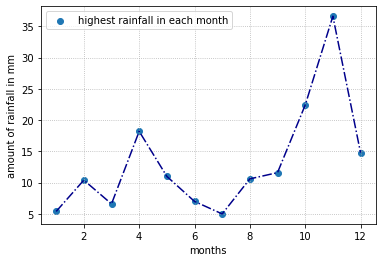

In [38]:
#plotting the maximum rainfall for each month
#Figure 1
import matplotlib.pyplot as plt
plt.scatter([1,2,3,4,5,6,7,8,9,10,11,12],max_month, label="highest rainfall in each month")
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], max_month, color='darkblue', linestyle='-.')
plt.xlabel("months")
plt.ylabel("amount of rainfall in mm")
plt.grid(linestyle="dotted")
plt.legend()
plt.show()

## Task 2.2 

In [39]:
#reading the data only between 2015-2017 
import matplotlib.pyplot as plt
data15_17=clean_df[(clean_df['year']== 2015)| (clean_df['year']== 2016) | (clean_df['year']== 2017) ]
df15_17=pd.DataFrame(data15_17)
df15_17

,year,month,day,rainfall
578,2015,1,1,0.0
579,2015,1,2,0.0
580,2015,1,3,0.0
581,2015,1,4,4.2
582,2015,1,5,0.0
...,...,...,...,...
1668,2017,12,27,0.0
1669,2017,12,28,0.0
1670,2017,12,29,0.2
1671,2017,12,30,8.4


In [40]:
#grouping the data on the basis of years and getting the total rainfall in each year
dyear=df15_17.groupby("year")["rainfall"].sum()
dyear

year
2015    440.406593
2016    599.600000
2017    602.000000
Name: rainfall, dtype: float64

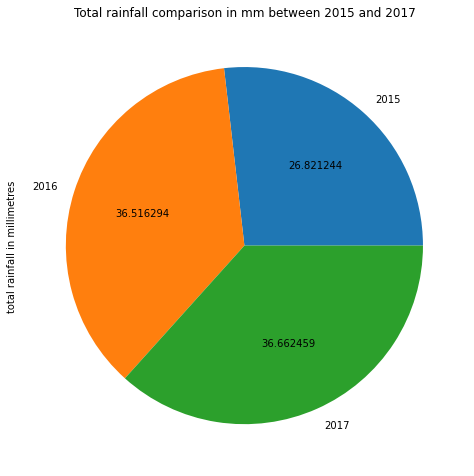

In [41]:
#plotting a bar graph to depict the difference between the total amount of rainfall in each year
# FIGURE 2
pie = dyear.plot(figsize=(8, 10), ylabel='total rainfall in millimetres', kind="pie",autopct="%2f")
plt.title("Total rainfall comparison in mm between 2015 and 2017")
plt.show()

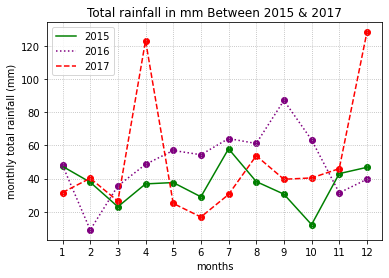

In [42]:
#plotting the total rainfall in each month of years between 2015-2017 
# FIGURE 3
x2015=df15_17[df15_17["year"]==2015]
ysum=x2015.groupby("month")['rainfall'].sum()

x2016=df15_17[df15_17["year"]==2016]
ysum16=x2016.groupby("month")['rainfall'].sum()

x2017=df15_17[df15_17["year"]==2017]
ysum17=x2017.groupby("month")['rainfall'].sum()

plt.scatter([1,2,3,4,5,6,7,8,9,10,11,12], ysum, color='g' )
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], ysum, label='2015', color='g')

plt.scatter([1,2,3,4,5,6,7,8,9,10,11,12], ysum16, color='purple')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], ysum16, label='2016', color='purple', linestyle='dotted')

plt.scatter([1,2,3,4,5,6,7,8,9,10,11,12], ysum17, color='r')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], ysum17, label='2017', color='r', linestyle='--')

plt.xlabel("months")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylabel("monthly total rainfall (mm)")
plt.title("Total rainfall in mm Between 2015 & 2017")
plt.grid(linestyle="dotted")
plt.legend()
plt.show()

## Task 2.3 

In [43]:
#fetching the years with highest and the lowest rainfall
sorted_year=clean_df.groupby('year')['rainfall'].max()
year=sorted_year.sort_values(ascending=False)
year

year
2020    54.6
2021    45.4
2017    43.8
2018    41.2
2022    38.6
2023    38.4
2014    36.6
2015    30.6
2013    30.2
2016    22.6
2019    15.4
Name: rainfall, dtype: float64

In [44]:
#fetching the data from 2017,2020,2021 as they had the most rainfall
maxdf=clean_df[(clean_df['year']== 2020)| (clean_df['year']== 2021) | (clean_df['year']== 2017) ]
maxdf

,year,month,day,rainfall
1309,2017,1,1,0.0
1310,2017,1,2,0.4
1311,2017,1,3,0.4
1312,2017,1,4,0.0
1313,2017,1,5,0.0
...,...,...,...,...
3126,2021,12,27,0.2
3127,2021,12,28,0.0
3128,2021,12,29,0.0
3129,2021,12,30,0.0


In [45]:
#fetching the data from 2017,2020,2021 as they had the least rainfall
mindf=clean_df[(clean_df['year']== 2013)| (clean_df['year']== 2016) | (clean_df['year']== 2019) ]
mindf

,year,month,day,rainfall
0,2013,6,2,5.0
1,2013,6,3,0.2
2,2013,6,4,0.2
3,2013,6,5,0.0
4,2013,6,6,0.0
...,...,...,...,...
2395,2019,12,27,0.0
2396,2019,12,28,0.0
2397,2019,12,29,0.0
2398,2019,12,30,0.0


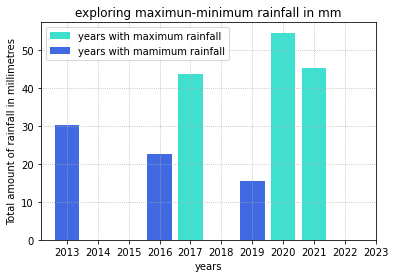

In [46]:
# FIGURE 4
maxy=maxdf.groupby('year')['rainfall'].max()


miny=mindf.groupby('year')['rainfall'].max()


plt.bar(maxy.index,maxy,color="turquoise",label="years with maximum rainfall")
plt.bar(miny.index,miny,color="royalblue",label="years with mamimum rainfall")

plt.xticks(year.index)
plt.xlabel("years")
plt.ylabel("Total amount of rainfall in millimetres")
plt.title("exploring maximun-minimum rainfall in mm")
plt.legend()
plt.grid(linestyle="dotted")
plt.show()

## Task 2.4

In [47]:
#getting the average rainfall of years between 2013 to 2023
changes=clean_df.groupby('year')['rainfall'].mean()
diff=changes.sort_values(ascending=False)
diff

year
2020    2.149727
2022    1.916164
2021    1.880441
2013    1.784977
2017    1.653846
2016    1.638251
2023    1.576923
2018    1.420994
2015    1.206593
2014    1.183562
2019    1.031405
Name: rainfall, dtype: float64

In [48]:
ten_years=['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']

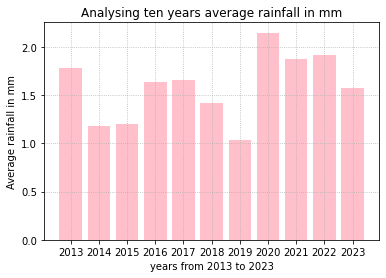

In [49]:
#displaying difference in rainfall in ten years
# FIGURE 5
plt.bar(ten_years,changes,color='pink')
plt.ylabel("Average rainfall in mm")
plt.xlabel("years from 2013 to 2023")
plt.title("Analysing ten years average rainfall in mm")
plt.grid(linestyle="dotted")
plt.show()